# ECS7024 Statistics for Artificial Intelligence and Data Science

## Georgia Gunson

## Aims and outline

The overall aim of this notebook is to investigate the hypothesis that storks deliver babies whilst gaining an understanding of the different socioeconomic and geoographic factors that may influence birth rate and its statistical association with storks. 

 1. Section 1: Load and Review the Data
     1. Distributions
     1. Correlations

 1. Section 2: Implement Two Regression Models for the Number of Births
     1. Model 1: Storks
     1. Model 2: Humans, GDP per capita, population density

 1. Section 3: Use the Bootstrap Technique to Construct Confidence Intervals
     1. Confidence Intervals for the Predictors Weights (‘beta’) in Model 
     1. Confidence Interval for the Difference in Performance of the Two Models

 1. Section 4: Overall Conclusions


In [1]:
# Load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

## Part 1:  Load and Review the Data

The data used in the analysis of this report has been taken from the paper 'Storks Deliver Babies (p = 0.008)' by Robert Matthews (2000) [1]. It includes information on the area (in km<sup>2</sup>), stork pair number, humans (10<sup>6</sup>) and birth rate (10<sup>3</sup>/year) for 17 European countries. Demographic information was sourced from the Britannica Yearbook for 1990 and stork breeding pair data directly from Chris Harbard of the Royal Society for the Protection of Birds. 

Additionally, a column has been incorporated into the dataset to include GDP per capita ($) for each of the 17 countries.

**Citation:**
Matthews, R. (2000). *Storks Deliver Babies (p = 0.008)*. Teaching statistics 22(2). Wiley: 36–38. https://doi.org/10.1111/1467-9639.00013



In [2]:
# Load the data 
storks_df = pd.read_csv('storks.csv')

The population density (10<sup>6</sup>/ km<sup>2</sup>), calculated using the number of Humans (10<sup>6</sup>) divided by the Area (km<sup>2</sup>) of each country, has also been added to the dataset.

In [3]:
# Add a new variable showing the population density (millions per Km2)
storks_df['Poplulation_density'] = storks_df['Humans'] / storks_df['Area']

### Distributions
Possibly due to the small sample size of 17 entries, none of the variables in the data appear normally distributed, as observed in Figure 1. Area (Km<sup>2</sup>), the number of breeding stork pairs, birth rate (10<sup>3</sup>/year) and population density (10<sup>6</sup>/ km<sup>2</sup>) all observe positively skewed distributions. GDP per capita ($) appears to approximate a bimodal distribution with a minor mode between approximately \\$7000-10,000 and a major mode between \\$25,000 - 28,000.

**Figure 1.** The distributions of area, storks, humans, birth rate, GDP per capita and population density. The median for each variable is represented as a dashed line in red.

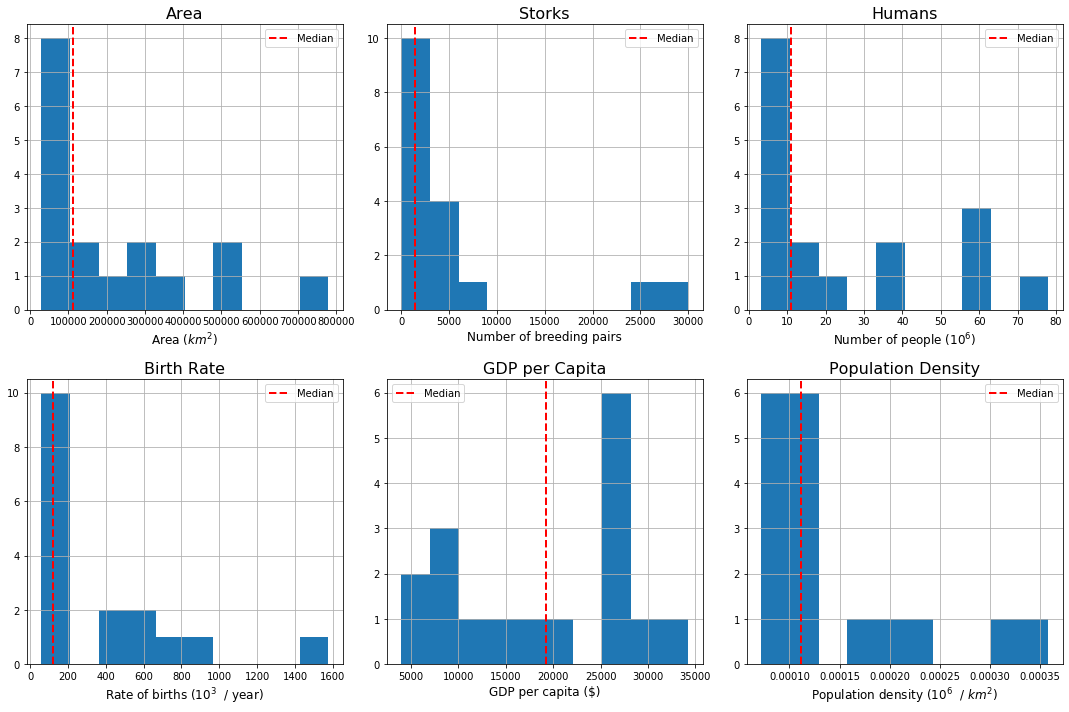

In [4]:
# Plot all histograms

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Area
area_ax = storks_df['Area'].hist(ax=axes[0, 0])
area_ax.set_title('Area', fontsize=16)
area_ax.set_xlabel('Area ($km^2$)', fontsize=12)
area_ax.axvline(storks_df['Area'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
area_ax.legend()

# Storks
storks_ax = storks_df['Storks'].hist(ax=axes[0, 1])
storks_ax.set_title('Storks', fontsize=16)
storks_ax.set_xlabel('Number of breeding pairs', fontsize=12)
storks_ax.axvline(storks_df['Storks'].median(), color='red', linestyle='dashed', linewidth=2,label='Median')
storks_ax.legend()

# Humans
humans_ax = storks_df['Humans'].hist(ax=axes[0, 2])
humans_ax.set_title('Humans', fontsize=16)
humans_ax.set_xlabel('Number of people ($10^6$)', fontsize=12)
humans_ax.axvline(storks_df['Humans'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
humans_ax.legend()

# Birth rate
birth_rate_ax = storks_df['BirthRate'].hist(ax=axes[1, 0])
birth_rate_ax.set_title('Birth Rate', fontsize=16)
birth_rate_ax.set_xlabel('Rate of births ($10^3$  / year)', fontsize=12)
birth_rate_ax.axvline(storks_df['BirthRate'].median(), color='red', linestyle='dashed', linewidth=2,label='Median')
birth_rate_ax.legend()

# GDP
gdp_ax = storks_df['GDP_per_capita'].hist(ax=axes[1, 1])
gdp_ax.set_title('GDP per Capita', fontsize=16)
gdp_ax.set_xlabel('GDP per capita ($)', fontsize=12)
gdp_ax.axvline(storks_df['GDP_per_capita'].median(), color='red', linestyle='dashed', linewidth=2,label='Median')
gdp_ax.legend()

# Population density
density_ax = storks_df['Poplulation_density'].hist(ax=axes[1, 2])
density_ax.set_title('Population Density', fontsize=16)
density_ax.set_xlabel('Population density ($10^6$  / $km^2$)', fontsize=12)
density_ax.axvline(storks_df['Poplulation_density'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
density_ax.legend()

# Fiddle with layout
plt.tight_layout()
plt.show()


### Correlations

Area exhibits a strong positive correlation with both humans (r=0.81) and birth rate (r=0.92), as seen in Table 1. Additionally, there is a moderate positive correlation between the number of breeding stork pairs and area (r=0.58), although this is less evident in the pairplot of Figure 2. A larger land area may support a greater stork population due to increased habitat and food sources. Storks also show a moderate positive correlation with birth rate (r=0.62), as discussed in the 'Storks Deliver Babies (p = 0.008)' paper. The absence of mechanism suggests that confounding variables likely contribute to this observed correlation.

Humans, as expected, show a strong positive correlation with birth rate. This is evident in Figure 2 and supported by a correlation coefficient of r = 0.85. Given a larger population of men and women, a higher birth rate is expected without external influences. Interestingly, no discernable relationship exists between the number of people and GDP per capita or population density. Population density, calculated as the number of humans divided by the area, would be expected to vary with the number of humans. However, a negative correlation is observed between area and population density (r = -0.33), as expected, though this is challenging to discern in Figure 2. An increase in area would typically lead to a reduction in population density if the population were to remain constant.

GDP per capita is a country's gross domestic product divided by its population, thus it is not expected to vary by the size of population. Weak negative correlations are observed between GDP per capita and both area and birth rate, with no evident relationship in Figure 2. However, a moderate negative association is found between GDP per capita and the number of breeding stork pairs (r=-0.53). This could reflect increased urbanisation in areas with a higher GDP and consequently less habitat for storks. GDP per capita shows a moderate positive association with population density (r=0.49), although the relationship in Figure 2 does not appear linear, with a slight curve. One explanation could be that a country with a higher population density may have more people in the workforce in a given area. However, further investigation is required to understand if this is a direct and linear relationship. 

In summary, initial exploration of relationships between variables suggest socioeconomic factors such as GDP per capita, as well as land area and population metrics, may be possible cofounders influencing the association between the number of breeding stork pairs and the birth rate in humans. 

**Table 1.** Correlation matrix of all continuous columns in the storks data for all 17 European countries. All correlation coefficients have been rounded to 2 decimal places.

In [5]:
# Get correlation matrix and round to 2 decimal places.
storks_df.corr().round(2)

,Area,Storks,Humans,BirthRate,GDP_per_capita,Poplulation_density
Area,1.00,0.58,0.81,0.92,-0.17,-0.33
Storks,0.58,1.00,0.35,0.62,-0.53,-0.30
Humans,0.81,0.35,1.00,0.85,0.07,0.02
BirthRate,0.92,0.62,0.85,1.00,-0.16,-0.13
GDP_per_capita,-0.17,-0.53,0.07,-0.16,1.00,0.49
Poplulation_density,-0.33,-0.30,0.02,-0.13,0.49,1.00


**Figure 2.** A pairplot of all variables in the stork data. The figure contains scatterplots of variable pairs and histograms on the diagonal. This plot enables visualisation of the relationship between variables as well as the distribution of each variable along the diagonal.

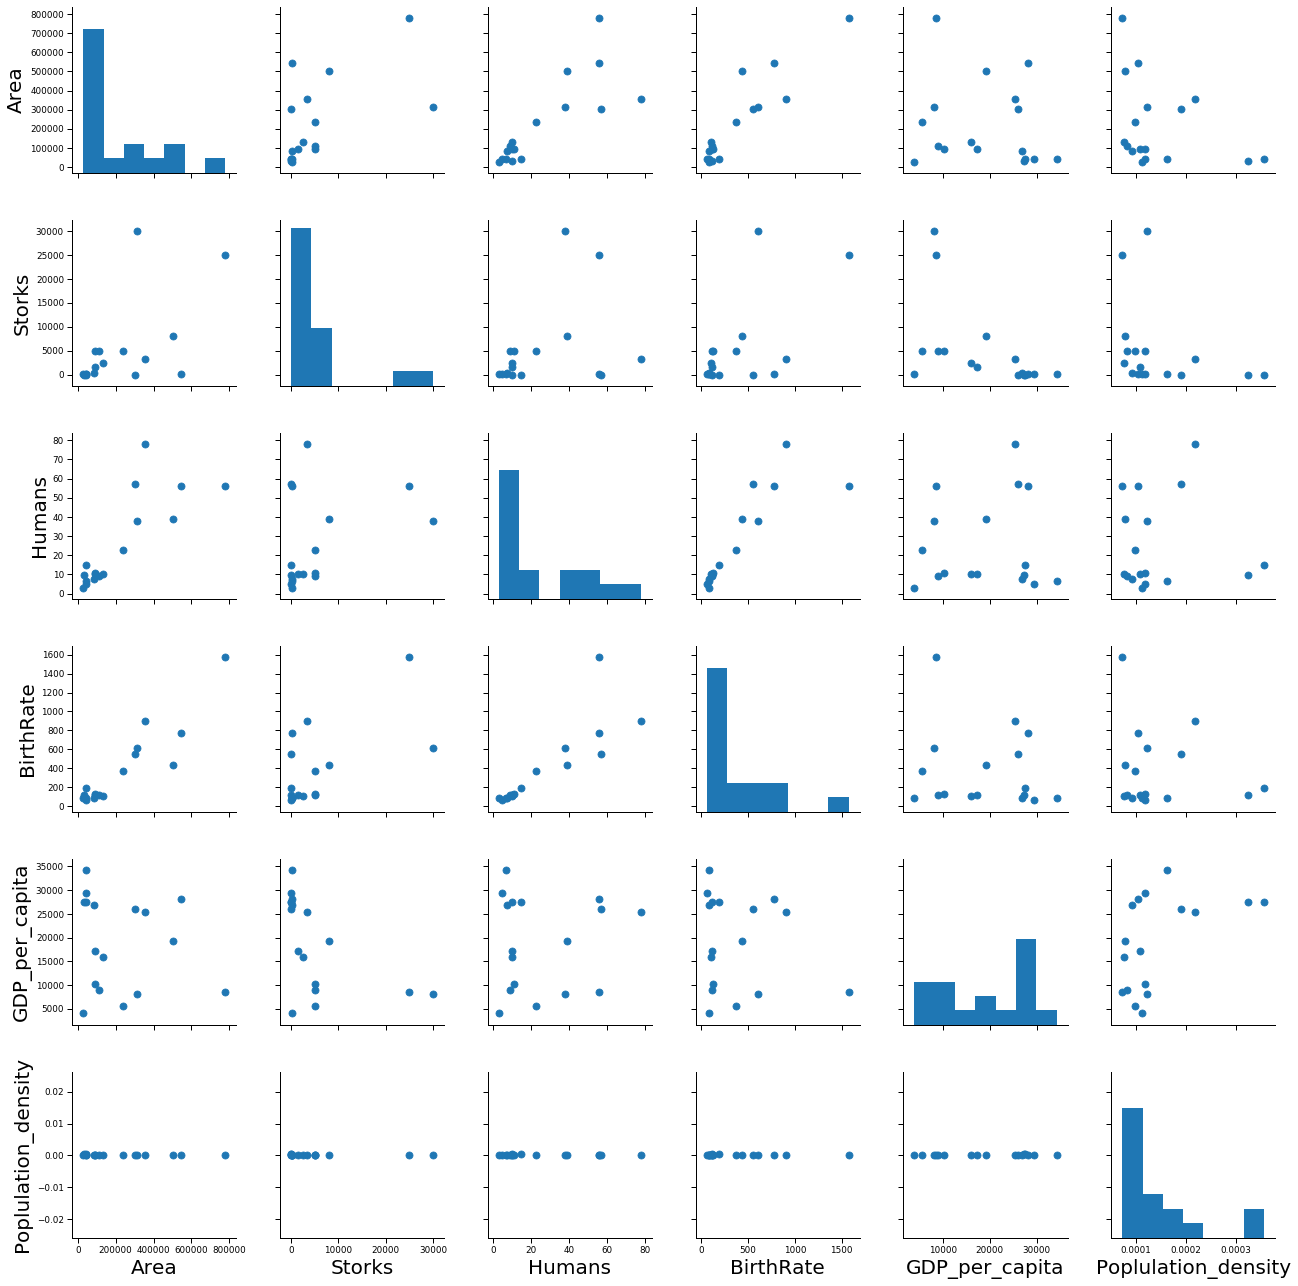

In [6]:
# Correlation matrix/ Pairplot

# Stack overflow solution for setting all axis label sizes in pairplot
sns.set_context("paper", rc={"axes.labelsize":20})
# Create pairplot of all variables
plot = sns.pairplot(storks_df, diag_kind="hist", height=3, plot_kws=dict(s=50, edgecolor=None), diag_kws= dict( bins=7))
plot

## Part 2: Implementing Two Regression Models for the Number of Births

In this section, we will implement linear regression to compare how variables of interest explain the variability of the number of births or 'birth rate'. We will compare two regression models with different predictors to examine how the variables may influence birth rate.

### Model 1: Storks 

Here, we will use the number of breeding stork pairs as a predictor, as in the paper 'Storks Deliver Babies (p = 0.008)'. Our objective is to assess the extent to which the number of stork pairs explains the variation in the birth rate.

#### Interpreting the results

The R2 coefficient, known as the coefficient of determination, measures how well a linear regression model fits the data and is one method to evaluate the model performance. The value of R2 ranges from 0 to 1, with 1 being a perfect prediction and 0 showing that the model does not predict the target variable.

In [7]:
# Convert to numpy array
# Predictor: number of storks
X = storks_df[['Storks']].values 
# label: birth rate
y = storks_df['BirthRate'].values

In [8]:
# Perform the regression
reg = LinearRegression().fit(X, y)

# Get the coefficients
coefficients = reg.coef_
# Create column of predictor names
predictor_names = ['Storks']

# Put in table
coef_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': coefficients})

In [9]:
print('The R2 coefficient of determination for model 1 is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)

The R2 coefficient of determination for model 1 is 0.385
The intercept is 225.0


The R2 coefficient of determination for model 1 was 0.385. This indicates that approximately 39% of the variation in the rate of births can be explained by the number of breeding stork pairs. This result suggests the existence of unaccounted factors contributing to the remaining 61% of variation in birth rate. One possible explanation could include unaccounted for predictor variables in our regression model. Additionally, the unexplained mechanism for the association between the number of storks and human births may be attributed to the influence of confounding variables not considered in our model.

The intercept for model 1 was 225 ($10^3$  / year). This value represents the predicted value of the target variable, birth rate, when the predictor variable is 0 i.e. when storks have no impact on the birth rate. 

**Table 2.** Table of Beta coefficients per each predictor variable from the linear regression model using storks as a predictor. 

In [10]:
coef_df

,Predictor,Coefficient
0,Storks,0.028794


The coefficients in a linear regression model, often denoted as Betas, signify the expected change in the target variable (birth rate) for a one-unit change in the predictor variable. In Model 1, the number of breeding pairs of storks served as the predictor, and the Beta coefficient for storks was found to be 0.028794. This implies that, on average, the birth rate is expected to increase by 0.028794 units for each one-unit increase in the number of breeding pairs of storks in European countries. This corresponds to an average increase of 28.794 births per year for each additional breeding pair of storks. The magnitude of this positive relationship is small and is most likely influenced by one or multiple confounding variables.



#### Evaluating the model

In linear regression, the differences between the predicited and actual values of our target variable (birth rate) are referred to as 'residuals' or the 'errors'. The residuals are used to check the underlying assumptions of linear regression models i.e. that the relationship between predictor and target variables is linear. We can check if this relationship is linear or requires transformation by plotting the distribution of the residuals, Figure 3, and a scatter plot of predicted versus observed values, Figure 4.

The residuals do not follow a normal distribution in the histogram of Figure 4, they appear negatively skewed and thus do not meet the assumption of normality in the model's errors. This could indicate, as with the R2 coefficient of determination, that there are unaccounted for variables influencing the relationship between the predictor and response variables; storks and birth rate. The negative skewness implies that the model has a tendency to predict birth rate at lower values than observed. 

In the scatter plot of Figure 4, many points are clustered below the line of best fit, representing our linear regression model, and 4 data points notably above the line. This plot provides a good visualisation of the small sample size of our data, which could affect our analysis, whilst providing further evidence that our model does not explain most of the variation in birth rate as the data points do not cluster tightly along the regression line.

**Figure 3.** Histogram of the distribution of the residuals for model 1. Residuals, also referred to as the errors, are the differences between the predicted and actual values of the target variable, which in this context is the birth rate. 

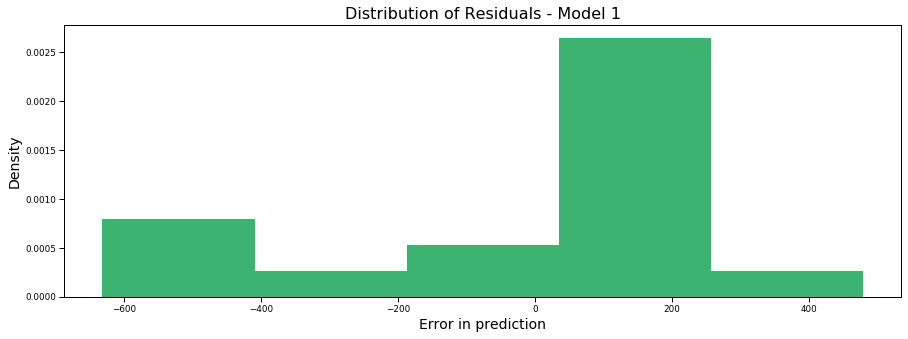

In [11]:
# Plot the residuals
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1, figsize=(15, 5))
residuals = y_hat - y
a1.hist(residuals, bins = 5, density=True, color="mediumseagreen")
a1.set_xlabel('Error in prediction', fontsize=14)
a1.set_ylabel('Density', fontsize=14)
a1.set_title('Distribution of Residuals - Model 1', fontsize=16)
plt.show()


**Figure 4.**  Scatter plot of the distribution of the residuals for model 1. Residuals, also referred to as the errors, are the differences between the predicted and actual values of the target variable, which in this context is the birth rate. The line of best fit is the regression line from our model. In a well-fitted model, data points should cluster closely around this line.

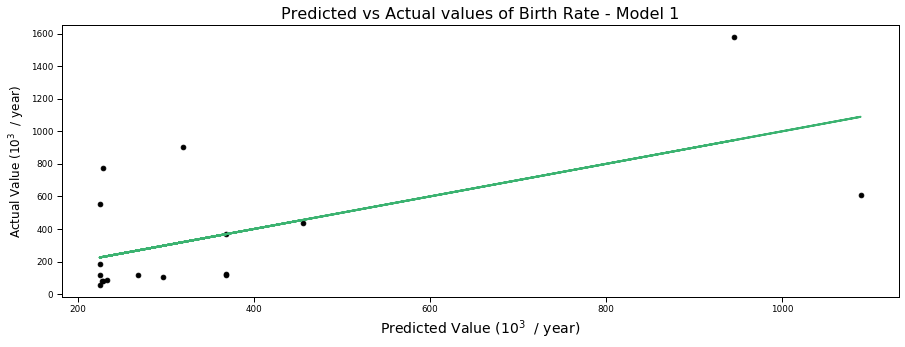

In [12]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,5))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='mediumseagreen', linewidth=2)

a.set_title('Predicted vs Actual values of Birth Rate - Model 1', fontsize=16)
a.set_xlabel('Predicted Value ($10^3$  / year)', fontsize=14)
a.set_ylabel('Actual Value ($10^3$  / year)', fontsize=12)
plt.show()

In [13]:
# Use predict() to return the predicted values of target variable
y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f'The Root Mean Squared Error (RMSE) for model 1 was: {rmse.round(2)}')

The Root Mean Squared Error (RMSE) for model 1 was: 312.03


In [14]:
birth_rate_range = storks_df['BirthRate'].max() - storks_df['BirthRate'].min()
print(f'The range of birth rate in the dataset is {birth_rate_range}')

The range of birth rate in the dataset is 1517


The Root Mean Squared Error (RMSE) measures how far, on average, the predicted values are from the actual observed values. A lower RMSE indicates that the model's predictions are closer to the actual data, while a higher RMSE suggests that the model's predictions have larger errors. The RMSE for model 1 was 312.03, meaning that, on average, our model's predictions of birth rate deviate from the actual values by 312.03 ($10^3$/year). Considering the range of birth rate for our data was 1517 ($10^3$/year), the RMSE of 312.03 ($10^3$/year) is a large discrepancy and indicates that our model has a poor predictive accuracy in estimating the rate of births.

In summary, the R2 coefficient of model 1 indicates only 39% of the variation in the birth rate is explained by the predictors, while the RMSE of 312.03 highlights significant prediction errors. The non-normally distributed residuals, relatively small beta coefficient for storks and unexplained variance further suggest the presence of confounding variables not considered in model 1's analysis, influencing the association between storks and human birth rate.

### Model 2: Humans, GDP per capita, population density

In Model 2, we will use the population size, otherwise referred to as 'Humans', the GDP per capita and the population density as predictors and evaluate their performance in explaining variation in birth rate.

The different ranges of our predictor variables, e.g. the population of humans (10<sup>6</sup>), the GDP per capita ($) and population density (10<sup>6</sup>/ km<sup>2</sup>) can make interpretation of the model coefficients difficult to compare. In order to accurately compare Beta coefficients, it is necessary to standardise the ranges of our predictors. For our analysis, we standardised the population or 'Humans', the GDP per capita and the population density to account for these difference in ranges.

In [15]:
# Data preparation

# Create copy of data for standardisation
storks_stand = storks_df.copy()

# Standardise variables with different ranges
storks_stand[['Humans','GDP_per_capita','Poplulation_density']] = StandardScaler().fit_transform(storks_df[['Humans','GDP_per_capita','Poplulation_density']])

In [16]:
# Convert to numpy array
# Predictors : Humans, GDP per capita, population density
X2 = storks_stand[['Humans','GDP_per_capita','Poplulation_density']].values 
# label: birth rate
y2 = storks_stand['BirthRate'].values

In [17]:
# Perform the regression
reg2 = LinearRegression().fit(X2, y2)

# Get the coefficients
coefficients2 = reg2.coef_
# Create column of predictor names
predictor_names2 = ['Humans','GDP_per_capita','Poplulation_density']

# Put in table
coef_df2 = pd.DataFrame({'Predictor': predictor_names2, 'Coefficient': coefficients2})

#### Interpreting the results

In [18]:
print('The R2 coefficient of determination for model 2 is %4.3f' % reg2.score(X2, y2).round(2))
print('The intercept is %4.1f' % reg2.intercept_.round(2))

The R2 coefficient of determination for model 2 is 0.770
The intercept is 370.7


The R2 coefficient of determination for model 2 was 0.770, indicating that approximately 77% of the variation in birth rate can be explained by the predictors: population, GDP per capita and population density in our regression model. Approximately 23% of the variation in birth rate is unexplained. This could be due to other predictor variables that are not included in model 2.

The intercept for model 2 was 370.7 ($10^3$  / year). This value represents the predicted value of the target variable, birth rate, when all predictor variables are 0 and thus have no impact on the number of births. 

**Table 3.** Table of Beta coefficients per each predictor variable from the linear regression model using Humans, GDP per capita and population density as predictors. All coefficients are reported to 2 decimal places.

In [19]:
coef_df2.round(2)

,Predictor,Coefficient
0,Humans,344.31
1,GDP_per_capita,-74.94
2,Poplulation_density,-22.62


In [20]:
# calculate the change in the target values as a percentage of its range
# that would result from the changing each of the predictor variables over its range

# Get coefficients, probably a better way but I get the predictors confused
beta_Humans = coef_df2[coef_df2['Predictor'] == 'Humans']['Coefficient'].values[0]
beta_GDP = coef_df2[coef_df2['Predictor'] == 'GDP_per_capita']['Coefficient'].values[0]
beta_pop_den = coef_df2[coef_df2['Predictor'] == 'Poplulation_density']['Coefficient'].values[0]

# Get ranges for standardised predictors
Humans_range = storks_stand['Humans'].quantile(0.9) - storks_stand['Humans'].quantile(0.1)
GDP_range = storks_stand['GDP_per_capita'].quantile(0.9) - storks_stand['GDP_per_capita'].quantile(0.1)
pop_den_range = storks_stand['Poplulation_density'].quantile(0.9) - storks_stand['Poplulation_density'].quantile(0.1)

# Calculate the changes in the target variable (birth rate) as a percent of its range
birth_range = storks_stand['BirthRate'].quantile(0.9) - storks_stand['BirthRate'].quantile(0.1)

Human_birthrate_change = (100 * (beta_Humans * Humans_range) / birth_range)
GDP_birthrate_change = (100 * (beta_GDP * GDP_range) / birth_range)
pop_den_birthrate_change=  (100 * (beta_pop_den * pop_den_range) / birth_range)

#### Humans

In [21]:
print ('The change in birth rate (as a percent of its range) given by the coefficient of the population (over its range) was %4.1f percent.'
       %(Human_birthrate_change))

The change in birth rate (as a percent of its range) given by the coefficient of the population (over its range) was 102.3 percent.


For each one standard deviation increase in the standardised population variable (Humans), model 2 predicts the birth rate to change by 102.3 percent of the range of the birth rate across the 17 countries in the dataset. As expected, this suggests that, on average, larger populations are associated with a higher predicted birth rate in a given year.

#### GDP per capita

In [22]:
print ('The change in birth rate (as a percent of its range) given by the coefficient of GDP per capita (over its range) was %4.1f percent.'
       %(GDP_birthrate_change))

The change in birth rate (as a percent of its range) given by the coefficient of GDP per capita (over its range) was -22.8 percent.


Interestingly, the predictor variable GDP per capita demonstrated a negative relationship with birth rate in Model 2. For each one standard deviation increase in the GDP per capita, model 2 predicted a change in birth rates of -22.8% over the range of birth rate in the data. This suggests that, on average, higher GDP per capita is associated with a decrease in predicted birth rates. Using GDP per capita as a proxy for prosperity, this regression model provides evidence of an association between prosperity and a reduction in family size.

#### Population density

In [23]:
print ('The change in birth rate (as a percent of its range) given by the coefficient of population density (over its range) was %4.1f percent.'
       %(pop_den_birthrate_change))

The change in birth rate (as a percent of its range) given by the coefficient of population density (over its range) was -6.8 percent.


For each unit increase in population density, model 2 predicts the birth rate to change by -6.8 percent of the range of birth rates in the dataset. This result implies that on average, a higher population density is associated with a decrease in predicted birth rates. On possible reason for this could be that overcrowding in a given area may discourage large family sizes.

#### Evaluating the model

The residuals of the linear regression model 2 do not follow a normal distribution in Figure 5. The prediction errors are concentrated between approximately -120 and 220, indicating a relatively consistent spread above and below the actual values in the dataset. However, there is an extreme outlier at approximatley -650 which deviates from the rest of the residuals. The non-normal distribution of residuals may be associated with the skewed distributions observed in the predictor variables themselves, as seen in Figure 1. Further exploration into potential transformations of the data is advised to determine whether applying an appropriate transformation would enhance the fit of the predictors in regression model 2. 

In Figure 6, the scatter plot of predicted and actual values of birth rate from model 2 appears to cluster more tightly around the regression line than in model 1 (Figure 4). This suggests that the predictors in model 2 perform better at explaining the variation in birth rate than storks as the predictor in model 1, as supported by the higher R2 value of 0.77. For predicted values below 100 ($10^3$  / year), model 2 tends to underestimate the birth rate, as indicated by data points above the regression line. Conversely, for all other predictions greater than 100 ($10^3$  / year), except for the outlier, a trend of overestimation relative to the actual values is observed.

**Figure 5.** Histogram of the distribution of the residuals for model 2. Residuals, also referred to as the errors, are the differences between the predicted and actual values of the target variable, which in this context is the birth rate. 

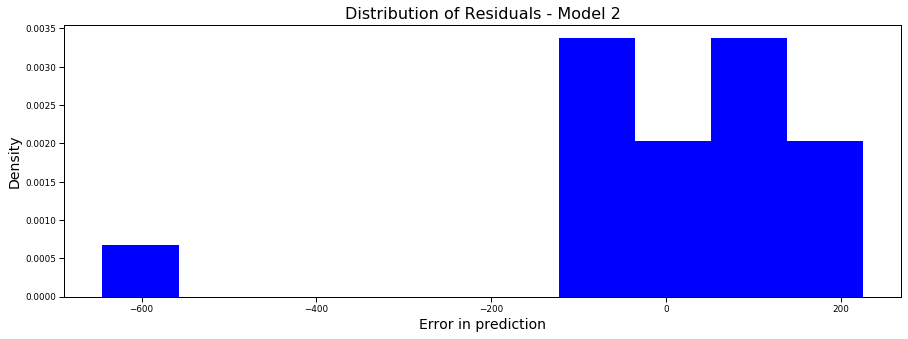

In [24]:
# Plot the residuals
y_hat2 = reg2.predict(X2)

fig, a1 = plt.subplots(1, 1, figsize=(15, 5))
residuals2 = y_hat2 - y2
a1.hist(residuals2,bins=10, density=True, color="blue")
a1.set_xlabel('Error in prediction', fontsize=14)
a1.set_ylabel('Density', fontsize=14)
a1.set_title('Distribution of Residuals - Model 2', fontsize=16)
plt.show()


**Figure 6.** Scatter plot of the distribution of the residuals for model 2. Residuals, also referred to as the errors, are the differences between the predicted and actual values of the target variable, which in this context is the birth rate. The line of best fit is the regression line from our model. In a well-fitted model, data points should cluster closely around this line.

Text(0, 0.5, 'Actual Value ($10^3$  / year)')

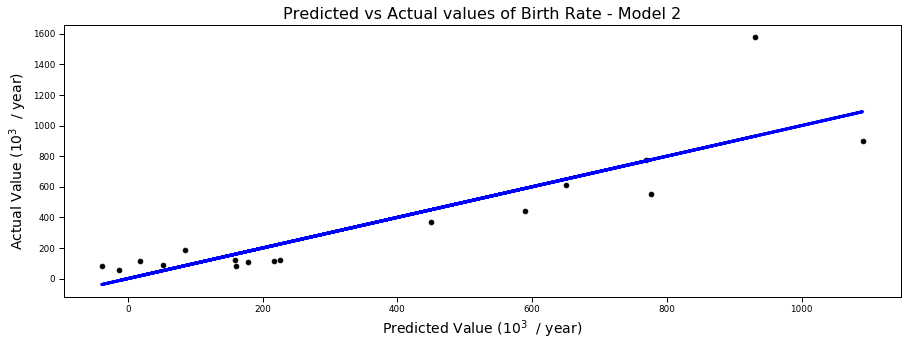

In [25]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,5))
a.scatter(y_hat2, y2,  color='black')
a.plot(y_hat2, y_hat2, color='blue', linewidth=3)

a.set_title('Predicted vs Actual values of Birth Rate - Model 2',fontsize=16)
a.set_xlabel('Predicted Value ($10^3$  / year)',fontsize=14)
a.set_ylabel('Actual Value ($10^3$  / year)',fontsize=14)

In [26]:
# Use predict() to return the predicted values of target variable
y_pred2 = reg2.predict(X2)

# Calculate the residuals
residuals2 = y2 - y_pred2

# Calculate the mean squared error
mse2 = mean_squared_error(y2, y_pred2)

# Calculate the root mean squared error (RMSE)
rmse2 = np.sqrt(mse2)

print(f'The Root Mean Squared Error (RMSE) for model 2 was: {rmse2.round(2)}')

The Root Mean Squared Error (RMSE) for model 2 was: 189.27


In [27]:
print(f'The minimum birth rate in the dataset was: {storks_df.BirthRate.min()}')
print(f'The maximum birth rate in the dataset was: {storks_df.BirthRate.max()}')

The minimum birth rate in the dataset was: 59
The maximum birth rate in the dataset was: 1576


The RMSE for model 2 was 189.27, reflecting that, on average, model 2's prediction of the birth rate deviates from the actual values by 189.27. Considering the range of birth rate in the dataset was 1517 ($10^3$/year), with a minimum value of 59 and a mazimum of 1576, this average prediction error is non-neglibile. I would interpret this as a moderate predictive accuracy but with the important consideration that there is a notable discrepancy in predicting the the birth rate.

In summary, model 2 outperforms model 1 in predicting birth rate in our dataset, supported by a higher R2 value of 0.77. This suggests that the combination of predictors; population size, GDP per capita and population density explain more variation in birth rate than the number of breeding stork pairs. However, the non-normal distribution of residuals in Model 2 implies the need for further exploration and potential transformations of predictors before regression analysis. While Model 2 explains a substantial portion of variability in birth rate and provides moderately accurate predictions, further investigation is required into the unexplained variance and to reduce prediction error.

## Part 3: Use the Bootstrap Technique to Construct Confidence Intervals

In this section, we will simulate multiple datasets by resampling the data for 'random' values many times. This technique, called bootstrap sampling, allows us to attempt to represent the original population of data. Evaluating the sampling distribution of model parameters by performing regression on the bootstrap samples allows us to assess the variability in the model's performance and make more robust stastical inferences. 

Initially, we will establish a function that enables us to perform resampling on a dataframe, apply a specified function to the resampled data, and aggregate the results to construct a bootstrap distribution.

In [28]:
# Create custom function to resample data and calculate a summary statistic for selected columns

# Inputs:
# data - the sample; can be dataframe or an array
# cols - a list of column headings in the results dataframe
# repeats - the number of times the process is repeated
# func - the function that calculates the results for each sample: must return a value for each column

def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

Secondly, we define a linear regression function which takes a dataframe as input, extracts the target variable and predictor variables, fits a linear regression model, captures the coefficients, and returns a list containing the intercept, coefficients, R-squared value and RMSE.

In [29]:
# Custom function to perform linear regression on a dataframe
# Sample data input,  Beta outputs are specific to model 2

# Inputs:
# Sample data

# Outputs:
# reg.intercept_ - model intercept
# beta_Human - beta coefficient for population size
# beta_GDP - beta for GDP per capita
# beta_pop_den - beta for population denisty
# reg.score(X, y) - coefficient of determination
# RMSE - model's RMSE

def doRegression_model2(df) :
    # Get target variable
    y = df.BirthRate 
    # Get predictors
    X = np.column_stack((df.Humans,df.GDP_per_capita, df.Poplulation_density))
    # Fit the regression model
    reg = LinearRegression().fit(X, y)
    # Capture coefficients
    beta_Human, beta_GDP, beta_pop_den = reg.coef_
    
    # Return coefficients, y intercept and R squared
    return [reg.intercept_,  beta_Human, beta_GDP, beta_pop_den, reg.score(X, y)] 


### Confidence Intervals for the Predictors Weights (‘beta’) in Model 2

We will us the bootstrap technique outlined in the previous section to evaluate the beta coefficients, otherwise known as 'weights', for the predictor variables 'GDP per capita' and 'population density' in model 2. 

In [30]:
# Bootstrap resampling on the standardised data with regression function, 500 times
bstrap = bootstrapC(storks_stand, ['Intercept', 'beta_Human', 'beta_GDP','beta_pop_den', 'R2'], 1000, doRegression_model2) 

**Figure 7.** Distribution of coefficients for the predictors 'GDP per capita' and 'Population Density' of model 2, obtained through bootstrap resampling with 1000 iterations. The upper and lower bounds of the 95% confidence interval (CI) are represented as dashed green and blue lines, respectively. In the histogram of the GDP per capita coefficient, the mean is visualised by a red dashed line. The median is annotated on the histogram of the population density coefficient, as a dashed purple line  due to its negative skew.

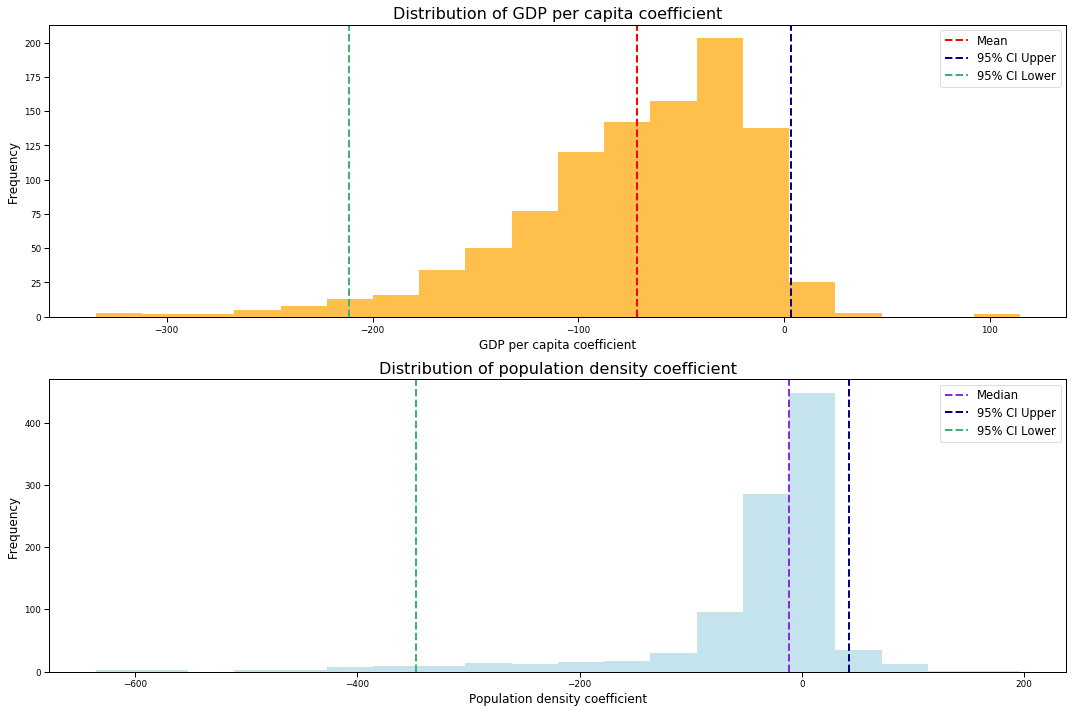

In [31]:
# Get beta_GDP and beta_pop_den from the bootstrap 
beta_GDP_values = bstrap['beta_GDP']
beta_pop_den_values = bstrap['beta_pop_den']

# Plot histograms for both betas
plt.figure(figsize=(15, 10))

# Beta of GDP per capita
plt.subplot(2, 1, 1)
plt.hist(beta_GDP_values, bins=20, color='orange', alpha=0.7)
plt.title('Distribution of GDP per capita coefficient', fontsize= 16)
plt.xlabel('GDP per capita coefficient', fontsize= 12)
plt.ylabel('Frequency',fontsize= 12)
# Add mean line
plt.axvline(beta_GDP_values.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
# add quantile lines (visualise CI of 95%)
plt.axvline(beta_GDP_values.quantile(0.975), color='darkblue', linestyle='dashed', linewidth=2, label='95% CI Upper')
plt.axvline(beta_GDP_values.quantile(0.025), color='mediumseagreen', linestyle='dashed', linewidth=2, label='95% CI Lower')


plt.legend(fontsize='large')

# Beta coefficient of population denisty
plt.subplot(2, 1, 2)
plt.hist(beta_pop_den_values, bins=20, color='lightblue', alpha=0.7)
plt.title('Distribution of population density coefficient', fontsize= 16)
plt.xlabel('Population density coefficient', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
# Add mean line
plt.axvline(beta_pop_den_values.median(), color='blueviolet', linestyle='dashed', linewidth=2, label='Median')
# add quantile lines (visualise CI of 95%)
plt.axvline(beta_pop_den_values.quantile(0.975), color='darkblue', linestyle='dashed', linewidth=2, label='95% CI Upper')
plt.axvline(beta_pop_den_values.quantile(0.025), color='mediumseagreen', linestyle='dashed', linewidth=2, label='95% CI Lower')

plt.legend(fontsize='large')

plt.tight_layout()
plt.show()

In [32]:
print("The mean GDP per capita coefficient is %3.2f, with 95%% CI from %3.2f to %3.2f" % 
      (beta_GDP_values.mean(), bstrap.beta_GDP.quantile(0.025), bstrap.beta_GDP.quantile(0.975)))
print("The median population density coefficient is %3.2f, with 95%% CI from %3.2f to %3.2f" % 
      (beta_pop_den_values.median(), bstrap.beta_pop_den.quantile(0.025), bstrap.beta_pop_den.quantile(0.975)))

The mean GDP per capita coefficient is -71.47, with 95% CI from -211.44 to 3.14
The median population density coefficient is -11.63, with 95% CI from -347.57 to 42.48


We performed resampling with replacement using the bootstrap approach with 1000 iterations. Linear regression using model 2 was performed on each bootstrap sample and the distribution of the coefficients for GDP per capita and population density were plotted in Figure 7. 

The distribution of GDP per capita coefficient across the bootstrap samples appears normally distributed with a slight negative skew. The mean GDP per capita coefficient is -71.47, suggesting a negative relationship between GDP per capita and the birth rate, on average. A 95% confidence interval (CI) was chosen as an appropriate alpha based on the distribution. The 95% CI for the GDP per capita coefficient is relatively wide, ranging from -211.44 to 3.149, indicating a high level of uncertainty in the estimate. This suggests that the true weight in the population could vary considerably and is worth taking into consideration when interpreting the relationship between GDP per capita and birth rate from the results of model 2.

The population density coefficient exhibits a negative skew in Figure 7. Accounting for this, the median is reported as a more robust measure of central tendancy. The median estimate for the population density coefficient is -11.63, indicating a negative relationship between population density and birth rate. A 95% CI was calculated for the population density coefficient, taking into account the skewed distribution. The resulting 95% CI ranges from -347.57  to 42.48, indicating a considerable level of uncertainty in the estimate. The negative relationship between population density and birth rate must be interpreted cautiously, with the variability in the estimated population density weight taken into consideration. 

In summary, both GDP per capita and population density coefficients observe negative relationships with birth rate, suggesting that, on average, a higher GDP per capita and population density are associated with lower birth rates per year. However, the wide confidence intervals for both coefficients demonstrate uncertainty in the estimates and further investigation is required to understand the magnitude of the relationship between both predictors and birth rate. While the bootstrap resampling approach attempts to capture samples that are representative of the true population, our original sample is small containing data for only 17 countries. This small sample size likely contributes to the observed variability and uncertainty in the estimates. For future analyses, a larger sample size is advised in combination with the bootstrap approach.

### Confidence Interval for the Difference in Performance of the Two Models

Finally, we will use the bootstrap technique to calculate and compare the Root Mean Squared Error (RMSE) between the predicted and actual values of the two linear regression models. We will run 1000 iterations of resampling with replacement for both linear regression models, evaluating the distribution of the RMSE differences to construct suitable confidence intervals.

In [33]:
# Custom function to run both model 1 and model 2 regressions and calculate RMSE per model & diff between the two
# Inputs:
# Sample data

# Outputs: 
# RMSE1 - the RMSE of model 1 for that sample
# RMSE2 - the RMSE of model 2 for that sample
# RMSE_diff - the difference in RMSE between model 1 and 2

def doRegression_models(df):
    
    # Get target variable
    y = df.BirthRate

    ## Model 1 
    # Get predictors
    X1 = df[['Storks']].values
    # Fit the regression model
    reg1 = LinearRegression().fit(X1, y)

    # Get predictions to compare to the original data
    predictions1 = reg1.predict(X1)

    # Calculate RMSE
    RMSE1 = np.sqrt(mean_squared_error(y, predictions1))

    ## Model 2 
    # Get predictors
    X2 = np.column_stack((df['Humans'], df['GDP_per_capita'], df['Poplulation_density']))
    # Fit the regression model
    reg2 = LinearRegression().fit(X2, y)

    # Get predictions to compare to the original data
    predictions2 = reg2.predict(X2)

    # Calculate RMSE
    RMSE2 = np.sqrt(mean_squared_error(y, predictions2))

    # Calculate differences in RMSE per sample
    RMSE_diff = RMSE1 - RMSE2

    # Return RMSE values for Model 1 and Model 2, and the difference in RMSE
    return [RMSE1, RMSE2, RMSE_diff]

In [34]:
# Run the resampling and calculation of RMSE for both models, 1000 times
bstrap_RMSE = bootstrapC(storks_stand, ['RMSE1', 'RMSE2', 'RMSE_diff'], 1000, doRegression_models)

**Figure 8.** Distribution of the differences in Root Mean Squared Error (RMSE) between the predicted and actual values for linear regression model 1 and 2. The distribution has been obtained by repeated sampling with replacement with 1000 iterations. The upper and lower bounds of the 95% confidence interval (CI) are represented as dashed green and blue lines respectively. The mean is visualised as dashed red line.

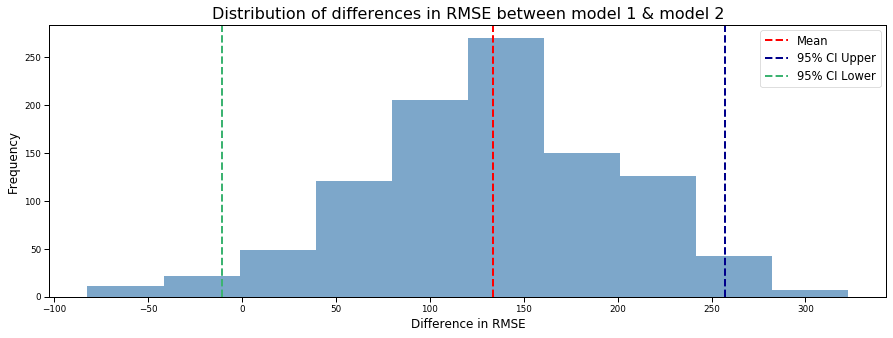

In [35]:
# Plot distribution of the differences in RMSE between models
plt.figure(figsize=(15, 5))
plt.hist(bstrap_RMSE['RMSE_diff'], color='steelblue', alpha=0.7)

plt.title('Distribution of differences in RMSE between model 1 & model 2', fontsize= 16)
plt.xlabel('Difference in RMSE', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)

# Add mean line
plt.axvline(bstrap_RMSE['RMSE_diff'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
# add quantile lines (visualise CI of 95%)
plt.axvline(bstrap_RMSE['RMSE_diff'].quantile(0.975), color='darkblue', linestyle='dashed', linewidth=2, label='95% CI Upper')
plt.axvline(bstrap_RMSE['RMSE_diff'].quantile(0.025), color='mediumseagreen', linestyle='dashed', linewidth=2, label='95% CI Lower')

plt.legend(fontsize='large')
plt.show()

In [36]:
print("The mean difference in RMSE is %3.2f, with 95%% CI from %3.2f to %3.2f" % 
      (bstrap_RMSE['RMSE_diff'].mean(), bstrap_RMSE['RMSE_diff'].quantile(0.025), bstrap_RMSE['RMSE_diff'].quantile(0.975)))

The mean difference in RMSE is 133.77, with 95% CI from -10.94 to 257.41


The differences in RMSE between linear regression models 1 and 2 appear to approximate a normal distribution with a subtle negative skew in Figure 8. The mean difference in RMSE observed was 133.77. This result suggests that, on average, the predictors of model 2 perform better in explaining the variability in birth rate than model 1. A 95% CI was constructed from the quantiles of the distribution with a lower bound of -10.94  and upper bound of 257.41. This range spans from no improvement in prediction error (lower CI) to a substantial increase (upper CI) in the prediction accuracy of the second model. It is important to note the uncertainty in this estimate, as reflected by the width of the confidence interval, when interpreting this result.

## Part 4: Overall Conclusions

In summary, our analysis aimed to test the hypothesis that storks deliver babies, expecting a strong positive correlation with birth rates in our sample data. However, model 1 which uses the number of breeding pairs of storks as the predictor of birth rate, and its lower performance in predicting birth rate in combination with absence of plausible mechanism suggests that this association is due to the influence of confounding variables. 

Our analysis revealed associations between the predictors 'GDP per capita' and 'population density' and the response variable 'birth rate' in European countries. Model 2, incorporating population size, GDP per capita, and population density, demonstrated superior performance than model 1 in explaining variation in birth rate, indicated by its higher R2 value of 0.77 and lower RMSE in bootstrap resampling. Negative associations with GDP per capita and population density imply that higher economic prosperity and population density are linked to lower birth rates. Interestingly, independent negative correlations between GDP per capita (r= -0.53) and population density (r= -0.30) with stork numbers (Table 1) provide insight into potential confounding factors contributing to the observed association between stork number and human birth rate.

However, there are limitations to our analysis, including the small sample size (17 countries) and potential unconsidered confounding variables, may have contribted to the the uncertainty in the estimates of the weights and the performance of both linear regression models. While the analysis provides valuable insights, further research with a larger dataset, careful consideration of additional variables and exploration of transformations of predictors is recommended to refine our understanding of the factors influencing birth rates.

In conclusion, our data supports the postulate that the relationship between storks and birth rate is not causative, with the observed correlation likely explained by the presence of different confounding variables. However, further analysis is required in order to reach a robust conclusion on both the factors influencing birth rates and increases in stork number, concurrently. 